# ***Szkolenie ML/AI 3***
### ***Zadanie regresji***

<div style="text-align: right;">
<small>Made by Aleksander Kołodziejczyk</small>
</div>

In [1084]:
#!pip install xgboost

In [1085]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
from xgboost import XGBRegressor

Dataset: https://www.kaggle.com/datasets/shivam2503/diamonds

In [1086]:
# Załadowanie danych
diamonds = sns.load_dataset('diamonds')
print(diamonds.head())
print(diamonds.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float6

In [1087]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [1088]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [1089]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

In [1090]:
# Zakodowanie zmiennych kategorycznych
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

In [1091]:
diamonds['cut'] = le_cut.fit_transform(diamonds['cut'])
diamonds['color'] = le_color.fit_transform(diamonds['color'])
diamonds['clarity'] = le_clarity.fit_transform(diamonds['clarity'])

In [1092]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<function matplotlib.pyplot.show(close=None, block=None)>

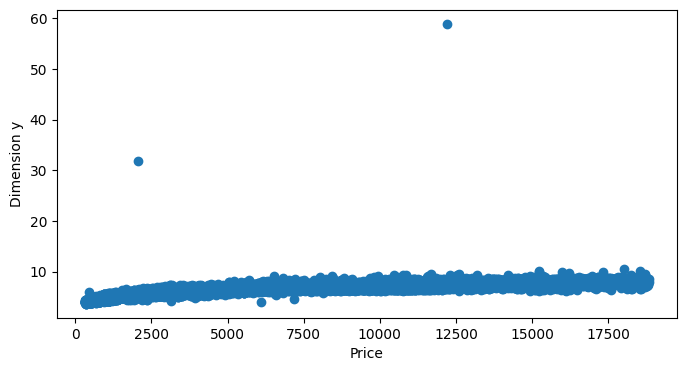

In [1093]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["y"])
plt.xlabel("Price")
plt.ylabel("Dimension y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

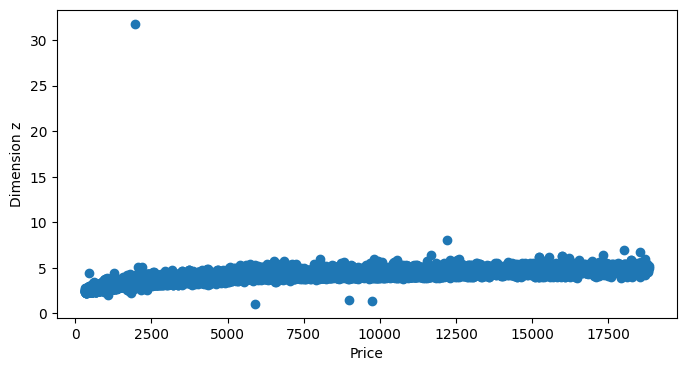

In [1094]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["z"])
plt.xlabel("Price")
plt.ylabel("Dimension z")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

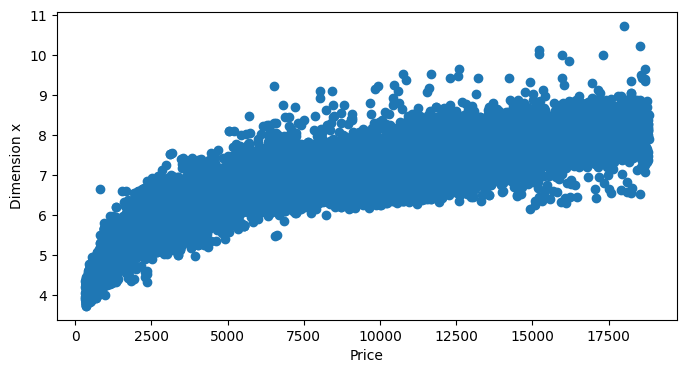

In [1095]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["x"])
plt.xlabel("Price")
plt.ylabel("Dimension x")
plt.show

In [1096]:
#Odrzucenie wartości odstających
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["y"]<20)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]
diamonds.shape

(53907, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

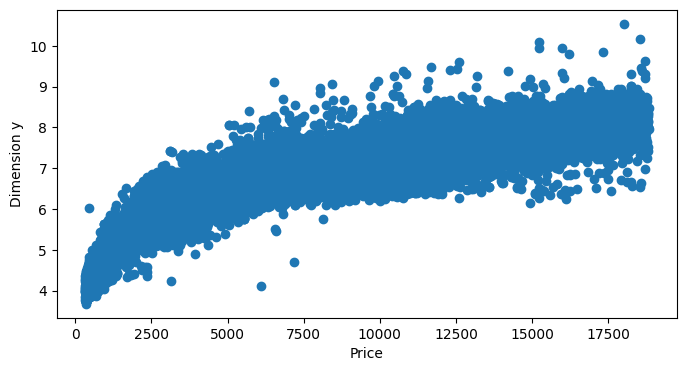

In [1097]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["y"])
plt.xlabel("Price")
plt.ylabel("Dimension y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

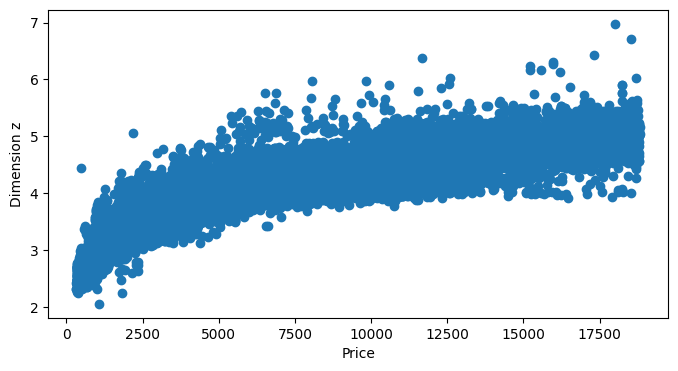

In [1098]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["z"])
plt.xlabel("Price")
plt.ylabel("Dimension z")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

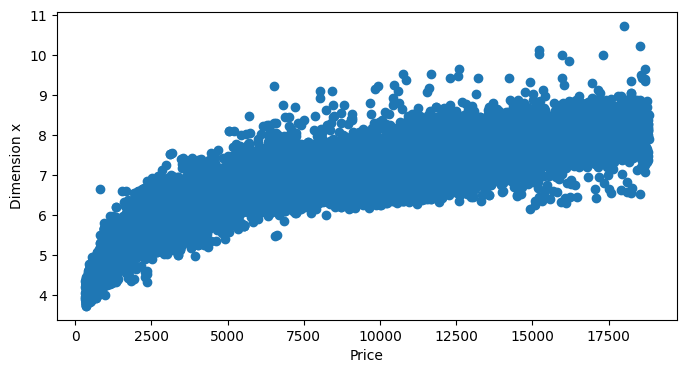

In [1099]:
plt.figure(figsize=(8,4))
plt.scatter(diamonds["price"], diamonds["x"])
plt.xlabel("Price")
plt.ylabel("Dimension x")
plt.show

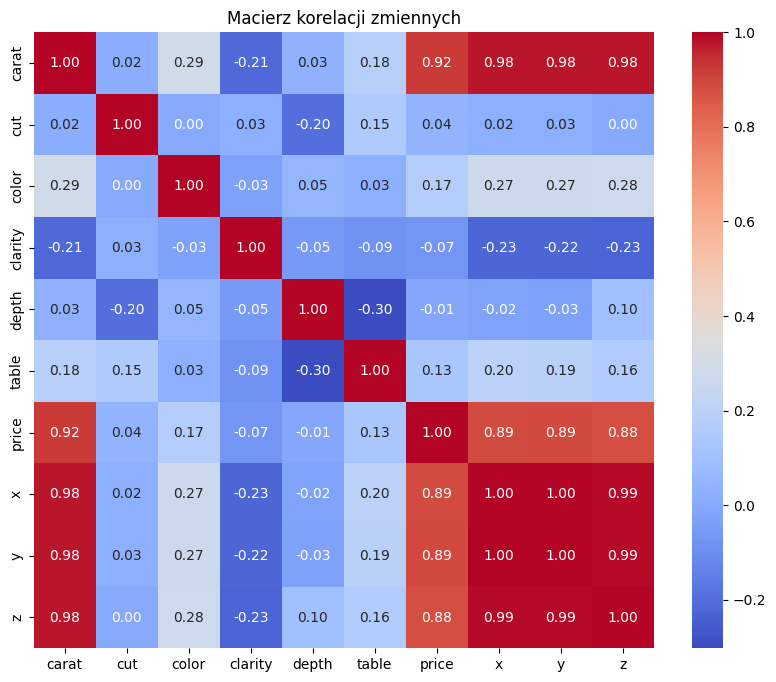

In [1100]:
# Wykres korelacji
corr = diamonds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji zmiennych')
plt.show()

In [1101]:
# Do wyboru odrzucenie cech, albo zostawienie

# diamonds.drop(["cut", "color", "clarity", "depth", "table", "x", "y", "z"], axis=1, inplace=True)

# diamonds.drop(["x", "y", "z"], axis=1, inplace=True)

# Do porównania co się stanie i jaki ma wpływ korelacja cech z target variable

In [1102]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [1103]:
corr = diamonds.corr()

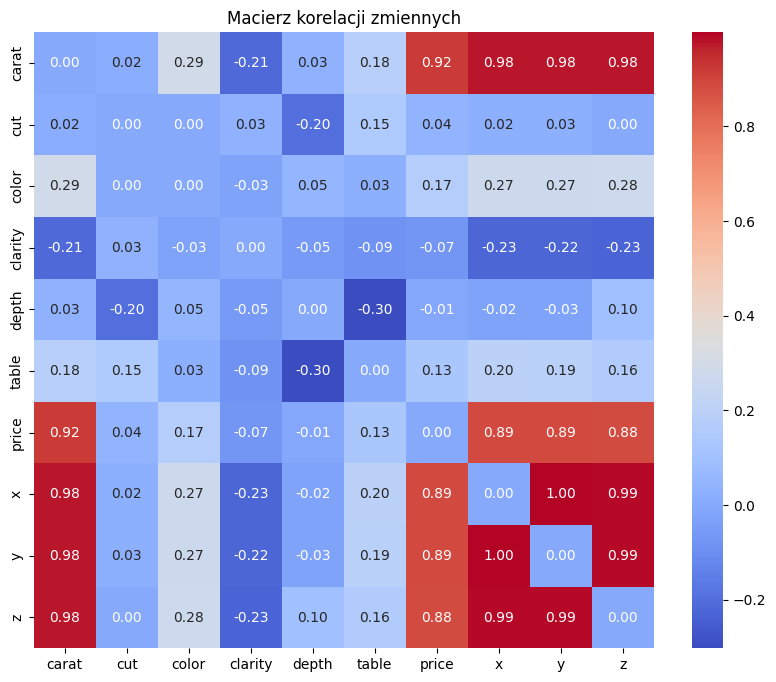

In [1104]:
# Wykres korelacji
np.fill_diagonal(corr.to_numpy(), 0) # wyzerowanie przekątnej w celu lepszej wizualizacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji zmiennych')
plt.show()

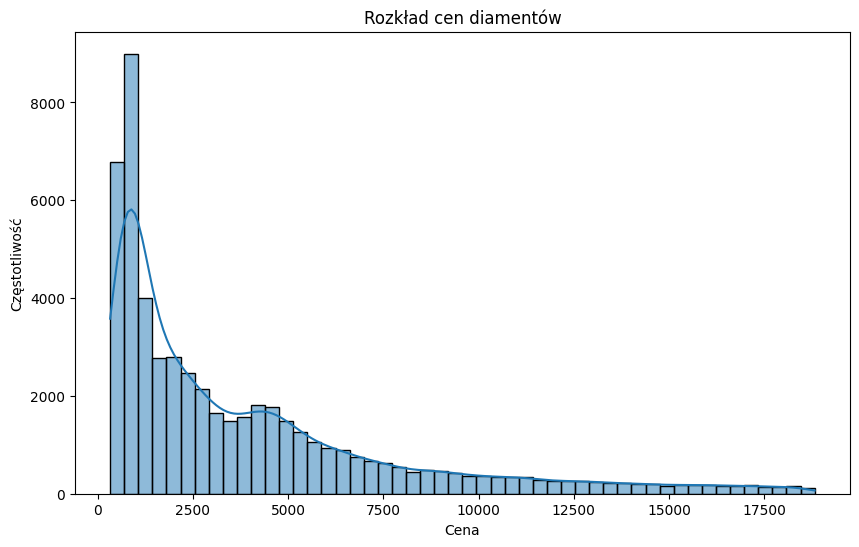

In [1105]:
# Rozkład cen
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], kde=True, bins=50)
plt.title('Rozkład cen diamentów')
plt.xlabel('Cena')
plt.ylabel('Częstotliwość')
plt.show()

In [1106]:
scaler = StandardScaler()

In [1107]:
X = diamonds.drop('price', axis=1)
y = diamonds['price']

In [1108]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1109]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [1110]:
# pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",LinearRegression())])

# pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",Ridge())])

# pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",Lasso())])

# pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",ElasticNet())])

# pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",DecisionTreeRegressor())])

pipeline=Pipeline([("scaler",StandardScaler()), ("lr_classifier",XGBRegressor())])


pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr_classifier',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [1111]:
# Przewidywanie na zbiorze testowym
y_pred = pipeline.predict(X_test)

In [1112]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9804345965385437
Adjusted R^2: 0.9803361037831677
MAE: 279.69212973058126
MSE: 297153.52950931404
RMSE: 545.1179042274377


In [1113]:
# export_graphviz(model, out_file="drzewo.dot")

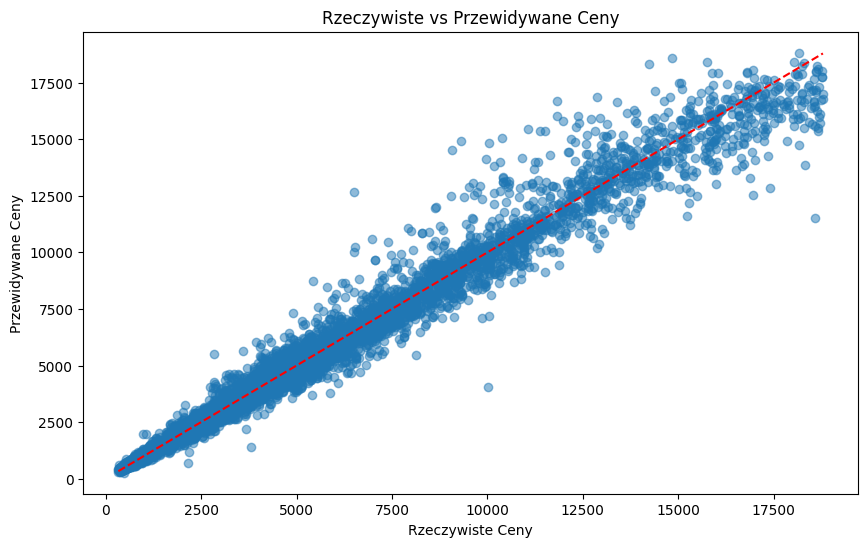

In [1114]:
# Wykres rozrzutu dla przewidywanych a rzeczywistych cen
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Rzeczywiste Ceny')
plt.ylabel('Przewidywane Ceny')
plt.title('Rzeczywiste vs Przewidywane Ceny')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linia idealnego dopasowania
plt.show()